In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("patrickb1912/ipl-complete-dataset-20082020")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\divya\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3


In [2]:
import os
file_1, file_2=os.listdir(path)
file_1
#file_1 is for deliveries
#file_2 is for matches

'deliveries.csv'

In [3]:
file_1_path=path+'/'+ file_1
file_2_path=path+'/'+ file_2
print("Done")

Done


In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("done")

done


In [5]:
df_matches= pd.read_csv(file_2_path)
df_deliveries= pd.read_csv(file_1_path)
print("Data loaded successfully")

Data loaded successfully


In [6]:
df_deliveries.head()
df_deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260919,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [7]:
df_matches.shape
# df_deliveries.shape

(1095, 20)

In [8]:
#first steps to find any null values oresent in data or not
df_matches.isnull().sum().sort_values(ascending=False)

method             1074
city                 51
result_margin        19
player_of_match       5
winner                5
target_runs           3
target_overs          3
id                    0
date                  0
season                0
venue                 0
match_type            0
toss_decision         0
toss_winner           0
team2                 0
team1                 0
result                0
super_over            0
umpire1               0
umpire2               0
dtype: int64

<Axes: >

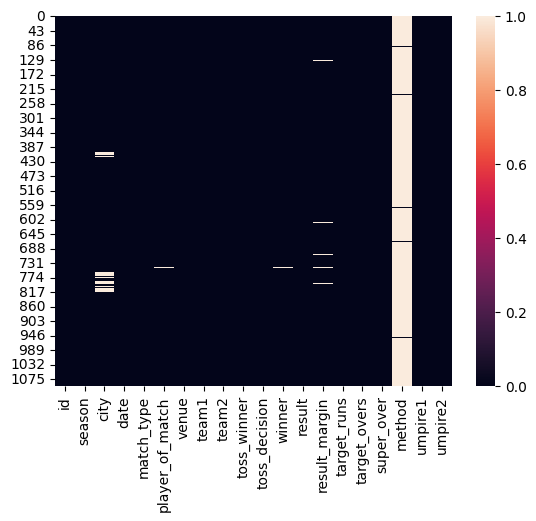

In [9]:
sns.heatmap(df_matches.isnull())


In [10]:
# showing the percentage of null values in each column
df_matches.isna().mean().sort_values(ascending=False)*100

method             98.082192
city                4.657534
result_margin       1.735160
player_of_match     0.456621
winner              0.456621
target_runs         0.273973
target_overs        0.273973
id                  0.000000
date                0.000000
season              0.000000
venue               0.000000
match_type          0.000000
toss_decision       0.000000
toss_winner         0.000000
team2               0.000000
team1               0.000000
result              0.000000
super_over          0.000000
umpire1             0.000000
umpire2             0.000000
dtype: float64

In [11]:
df_matches["method"].value_counts()

method
D/L    21
Name: count, dtype: int64

In [12]:
#if we want to fill null values in a column then we can use fillna() method
df_matches["method"].fillna("normal_method", inplace=True)


C:\Users\divya\AppData\Local\Temp\ipykernel_20572\3111768915.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches["method"].fillna("normal_method", inplace=True)


In [13]:
df_matches["city"].value_counts()

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Visakhapatnam      15
Durban             15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Navi Mumbai         9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Cape Town           7
Port Elizabeth      7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

In [14]:
df_matches[df_matches['city'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
399,729281,2014,NaN,2014-04-17,League,YS Chahal,Sharjah Cricket Stadium,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,146.0,20.0,N,normal_method,Aleem Dar,S Ravi
402,729287,2014,NaN,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,116.0,20.0,N,normal_method,Aleem Dar,AK Chaudhary
403,729289,2014,NaN,2014-04-19,League,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,167.0,20.0,N,normal_method,Aleem Dar,VA Kulkarni
404,729291,2014,NaN,2014-04-20,League,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,192.0,20.0,N,normal_method,BF Bowden,M Erasmus
406,729295,2014,NaN,2014-04-22,League,GJ Maxwell,Sharjah Cricket Stadium,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,194.0,20.0,N,normal_method,M Erasmus,S Ravi
407,729297,2014,NaN,2014-04-23,League,RA Jadeja,Dubai International Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,141.0,20.0,N,normal_method,HDPK Dharmasena,RK Illingworth
408,729299,2014,NaN,2014-04-24,League,CA Lynn,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,151.0,20.0,N,normal_method,Aleem Dar,VA Kulkarni
409,729301,2014,NaN,2014-04-25,League,AJ Finch,Dubai International Cricket Stadium,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,185.0,20.0,N,normal_method,M Erasmus,S Ravi
410,729303,2014,NaN,2014-04-25,League,MM Sharma,Dubai International Cricket Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,142.0,20.0,N,normal_method,BF Bowden,M Erasmus
413,729309,2014,NaN,2014-04-27,League,M Vijay,Sharjah Cricket Stadium,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,126.0,20.0,N,normal_method,Aleem Dar,VA Kulkarni


In [15]:
# if df_matches["city"].isna() and df_matches['venue']=='Dubai International Cricket Stadium':
#     # df_matches["city"].fillna("Dubai", inplace=True)

In [16]:
df_matches['city'].fillna("UAE",inplace=True)

C:\Users\divya\AppData\Local\Temp\ipykernel_20572\3908843120.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['city'].fillna("UAE",inplace=True)


In [17]:
df_matches[df_matches['result_margin'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
66,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,151.0,20.0,Y,normal_method,MR Benson,M Erasmus
130,419121,2009/10,Chennai,2010-03-21,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,137.0,20.0,Y,normal_method,K Hariharan,DJ Harper
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,normal_method,SS Hazare,RJ Tucker
328,598004,2013,Hyderabad,2013-04-07,League,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,131.0,20.0,Y,normal_method,AK Chaudhary,S Ravi
342,598017,2013,Bangalore,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,153.0,20.0,Y,normal_method,M Erasmus,VA Kulkarni
416,729315,2014,Abu Dhabi,2014-04-29,League,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,153.0,20.0,Y,normal_method,Aleem Dar,AK Chaudhary
475,829741,2015,Ahmedabad,2015-04-21,League,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,192.0,20.0,Y,normal_method,M Erasmus,S Ravi
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,normal_method,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,normal_method,HDPK Dharmasena,K Srinivasan
610,1082625,2017,Rajkot,2017-04-29,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,154.0,20.0,Y,normal_method,AK Chaudhary,CB Gaffaney


In [18]:
df_matches['result_margin'].fillna(0,inplace=True)

C:\Users\divya\AppData\Local\Temp\ipykernel_20572\4158405259.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['result_margin'].fillna(0,inplace=True)


In [19]:
df_matches[df_matches["winner"].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,0.0,NaN,NaN,N,normal_method,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,0.0,NaN,NaN,N,normal_method,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,0.0,188.0,20.0,N,normal_method,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,0.0,63.0,5.0,N,normal_method,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,0.0,NaN,NaN,N,normal_method,AK Chaudhary,NA Patwardhan


In [20]:
df_matches.fillna({"winner": "No Result",
                   "player_of_match":"No player of the match"}, inplace=True)
print("Done")

Done


In [21]:
df_matches.fillna(0,inplace=True)

In [22]:
df_matches["city"].value_counts()

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
UAE                51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Durban             15
Visakhapatnam      15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Indore              9
Navi Mumbai         9
Johannesburg        8
Ranchi              7
Port Elizabeth      7
Cuttack             7
Cape Town           7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

In [23]:
#Here we are replacing the city names with their respective country names
data_rp={"Abu Dhabi":"UAE",
          "Dubai":"UAE",
          "Sharjah":"UAE",
          "Bangaluru":"Bengalore",
          "Navi Mumbai":"Mumbai",
          "Kimberley":"Cape Town"}
df_matches.replace({"city":data_rp}, inplace=True)

In [24]:
df_matches["city"].value_counts().sort_values(ascending=False)


city
Mumbai            182
UAE               111
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Ahmedabad          36
Bengaluru          29
Visakhapatnam      15
Durban             15
Lucknow            14
Dharamsala         13
Centurion          12
Cape Town          10
Rajkot             10
Indore              9
Johannesburg        8
Ranchi              7
Port Elizabeth      7
Cuttack             7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
Nagpur              3
East London         3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

In [25]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [26]:
#check duplicates
df_matches.duplicated().value_counts()

False    1095
Name: count, dtype: int64

In [27]:
#date column must be in date type
df_matches["date"].info()
# pd.to_datetime() converts the date column to datetime type
df_matches["date"]=pd.to_datetime(df_matches["date"])

<class 'pandas.core.series.Series'>
RangeIndex: 1095 entries, 0 to 1094
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
1095 non-null   object
dtypes: object(1)
memory usage: 8.7+ KB


In [28]:
df_matches["date"].info()


<class 'pandas.core.series.Series'>
RangeIndex: 1095 entries, 0 to 1094
Series name: date
Non-Null Count  Dtype         
--------------  -----         
1095 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.7 KB


In [29]:
df_matches["venue"].value_counts().index

Index(['Eden Gardens', 'Wankhede Stadium', 'M Chinnaswamy Stadium',
       'Feroz Shah Kotla', 'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Sawai Mansingh Stadium',
       'Dubai International Cricket Stadium', 'Wankhede Stadium, Mumbai',
       'Punjab Cricket Association Stadium, Mohali', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'MA Chidambaram Stadium, Chepauk, Chennai',
       'Narendra Modi Stadium, Ahmedabad',
       'Maharashtra Cricket Association Stadium',
       'Dr DY Patil Sports Academy, Mumbai', 'Dr DY Patil Sports Academy',
       'Brabourne Stadium, Mumbai', 'Subrata Roy Sahara Stadium',
       'Eden Gardens, Kolkata', 'Arun Jaitley Stadium, Delhi', 'Kingsmead',
       'M.Chinnaswamy Stadium', 'Rajiv Gandhi International Stadium',
       'Arun Jaitley Stadium',
       'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',
       'M Chinnaswamy Stadium, Bengaluru',
       'Rajiv Gandhi Internat

In [30]:
df_matches["venue"].str.split(",")

0                                 [M Chinnaswamy Stadium]
1           [Punjab Cricket Association Stadium,  Mohali]
2                                      [Feroz Shah Kotla]
3                                      [Wankhede Stadium]
4                                          [Eden Gardens]
                              ...                        
1090    [Rajiv Gandhi International Stadium,  Uppal,  ...
1091                  [Narendra Modi Stadium,  Ahmedabad]
1092                  [Narendra Modi Stadium,  Ahmedabad]
1093         [MA Chidambaram Stadium,  Chepauk,  Chennai]
1094         [MA Chidambaram Stadium,  Chepauk,  Chennai]
Name: venue, Length: 1095, dtype: object

In [31]:
#apply used to run function 
#lambda is one liner anaynomis data (it basically move to each one rows)
df_matches['venue']=df_matches["venue"].apply(lambda row:row.title().split(",")[0])

In [32]:
df_matches["venue"].value_counts()

venue
Wankhede Stadium                                                118
Eden Gardens                                                     93
Ma Chidambaram Stadium                                           85
M Chinnaswamy Stadium                                            79
Rajiv Gandhi International Stadium                               77
Feroz Shah Kotla                                                 60
Sawai Mansingh Stadium                                           57
Dubai International Cricket Stadium                              46
Dr Dy Patil Sports Academy                                       37
Punjab Cricket Association Stadium                               35
Maharashtra Cricket Association Stadium                          35
Arun Jaitley Stadium                                             30
Sheikh Zayed Stadium                                             29
Sharjah Cricket Stadium                                          28
Brabourne Stadium                         

In [33]:
data_v_rp={"M.Chinnaswamy Stadium":"M Chinnaswamy Stadium",
           "Sardar Patel Stadium":"Narendra Modi Stadium"}
df_matches.replace({"venue":data_v_rp}, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

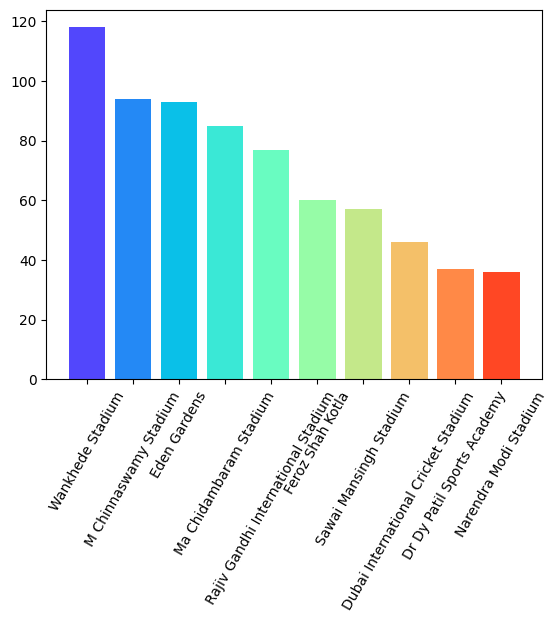

In [34]:
venue_name=df_matches["venue"].value_counts().head(10).index
venue_value=df_matches["venue"].value_counts().head(10).values
plt.bar(venue_name,venue_value,color=sns.color_palette("rainbow",10))
plt.xticks(rotation=60)
plt.show


In [35]:
df_matches['winner'].value_counts().reset_index()


,winner,count
0,Mumbai Indians,144
1,Chennai Super Kings,138
2,Kolkata Knight Riders,131
3,Royal Challengers Bangalore,116
4,Rajasthan Royals,112
5,Kings XI Punjab,88
6,Sunrisers Hyderabad,88
7,Delhi Daredevils,67
8,Delhi Capitals,48
9,Deccan Chargers,29


In [36]:
team_name_rp = {'Delhi Daredevils':'Delhi Capitals',
                'Royal Challengers Bangalore':'Royal Challengers Bengaluru',
                'Kings XI Punjab':'Punjab Kings',
                'Rising Pune Supergiant':'Rising Pune Supergiants',
                'Pune Warriors':'Rising Pune Supergiants'}
# df_matches['team1'].replace(team_name_rp, inplace=True)
# df_matches['team2'].replace(team_name_rp, inplace=True)
df_matches['toss_winner'].replace(team_name_rp, inplace=True)
df_matches['winner'].replace(team_name_rp, inplace=True)



print("Done")

Done


C:\Users\divya\AppData\Local\Temp\ipykernel_20572\3553053833.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['toss_winner'].replace(team_name_rp, inplace=True)
C:\Users\divya\AppData\Local\Temp\ipykernel_20572\3553053833.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [37]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [38]:
# drop umpire 
df_matches.drop(['umpire1', 'umpire2'],axis=1,inplace=True) #axis 1 means columns and 0 means rows

In [39]:
win=df_matches[df_matches['match_type']=='Final']['winner']
year=df_matches[df_matches['match_type']=='Final']['date'].dt.year

In [40]:
final_match = df_matches[df_matches['match_type'] == 'Final']
final_match["Winning Year"]=final_match["date"].dt.year

C:\Users\divya\AppData\Local\Temp\ipykernel_20572\1372109512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_match["Winning Year"]=final_match["date"].dt.year


Analysis

In [41]:
final_match[["winner","Winning Year"]]
df_matches['result'].value_counts()

result
wickets      578
runs         498
tie           14
no result      5
Name: count, dtype: int64

In [42]:
final_match.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'Winning Year'],
      dtype='object')

In [43]:
final_match.groupby("venue")['result'].value_counts()

venue                                result 
Dr Dy Patil Sports Academy           runs       1
                                     wickets    1
Dubai International Cricket Stadium  runs       1
                                     wickets    1
Eden Gardens                         runs       2
M Chinnaswamy Stadium                runs       1
                                     wickets    1
Ma Chidambaram Stadium               wickets    2
                                     runs       1
Narendra Modi Stadium                wickets    2
New Wanderers Stadium                runs       1
Rajiv Gandhi International Stadium   runs       2
Wankhede Stadium                     wickets    1
Name: count, dtype: int64

In [44]:
final_match.groupby("venue")['result'].value_counts().reset_index().sort_values(by='venue')


,venue,result,count
0,Dr Dy Patil Sports Academy,runs,1
1,Dr Dy Patil Sports Academy,wickets,1
2,Dubai International Cricket Stadium,runs,1
3,Dubai International Cricket Stadium,wickets,1
4,Eden Gardens,runs,2
5,M Chinnaswamy Stadium,runs,1
6,M Chinnaswamy Stadium,wickets,1
7,Ma Chidambaram Stadium,wickets,2
8,Ma Chidambaram Stadium,runs,1
9,Narendra Modi Stadium,wickets,2


In [45]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method'],
      dtype='object')

In [46]:
final_match.groupby(["venue","city"])['result'].value_counts().reset_index().sort_values(by='venue')


,venue,city,result,count
0,Dr Dy Patil Sports Academy,Mumbai,runs,1
1,Dr Dy Patil Sports Academy,Mumbai,wickets,1
2,Dubai International Cricket Stadium,UAE,runs,1
3,Dubai International Cricket Stadium,UAE,wickets,1
4,Eden Gardens,Kolkata,runs,2
5,M Chinnaswamy Stadium,Bangalore,runs,1
6,M Chinnaswamy Stadium,Bangalore,wickets,1
7,Ma Chidambaram Stadium,Chennai,wickets,2
8,Ma Chidambaram Stadium,Chennai,runs,1
9,Narendra Modi Stadium,Ahmedabad,wickets,2


day 13

In [47]:
# Questions to be solve?
# all season Winner Team
# Top 10 Match Winner team
# Toss_dicision_value_counts
# Result type value_counts
# Top 10 target Runs
# Maximum Result Margin Wins
# Top 5 Result Margin Wins
# Top 10 player_of_match
# Season Player of the match

In [48]:
# q1
final_match[["winner","Winning Year"]].sort_values(by='Winning Year')

,winner,Winning Year
57,Rajasthan Royals,2008
114,Deccan Chargers,2009
174,Chennai Super Kings,2010
247,Chennai Super Kings,2011
321,Kolkata Knight Riders,2012
397,Mumbai Indians,2013
457,Kolkata Knight Riders,2014
516,Mumbai Indians,2015
576,Sunrisers Hyderabad,2016
635,Mumbai Indians,2017


In [49]:
final_match.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,Winning Year
57,336040,2007/08,Mumbai,2008-06-01,Final,YK Pathan,Dr Dy Patil Sports Academy,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,164.0,20.0,N,normal_method,2008
114,392239,2009,Johannesburg,2009-05-24,Final,A Kumble,New Wanderers Stadium,Royal Challengers Bangalore,Deccan Chargers,Royal Challengers Bengaluru,field,Deccan Chargers,runs,6.0,144.0,20.0,N,normal_method,2009
174,419165,2009/10,Mumbai,2010-04-25,Final,SK Raina,Dr Dy Patil Sports Academy,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Chennai Super Kings,runs,22.0,169.0,20.0,N,normal_method,2010
247,501271,2011,Chennai,2011-05-28,Final,M Vijay,Ma Chidambaram Stadium,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,Chennai Super Kings,runs,58.0,206.0,20.0,N,normal_method,2011
321,548381,2012,Chennai,2012-05-27,Final,MS Bisla,Ma Chidambaram Stadium,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Kolkata Knight Riders,wickets,5.0,191.0,20.0,N,normal_method,2012


In [50]:
df_matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,normal_method
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,Punjab Cricket Association Stadium,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,normal_method
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,normal_method
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5.0,166.0,20.0,N,normal_method
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,normal_method


In [51]:
# Q2
df_matches["winner"].value_counts().head(10)

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bengaluru    123
Delhi Capitals                 115
Punjab Kings                   112
Rajasthan Royals               112
Sunrisers Hyderabad             88
Deccan Chargers                 29
Gujarat Titans                  28
Name: count, dtype: int64

In [52]:
# in numberical we only make histogram, barplot, boxplot, scatterplot, lineplot etc.
# and in catagorical we can make countplot, barplot, piechart etc.
# All Univariate analysis
num_cols = df_matches.describe().columns
cat_cols = df_matches.describe(include = 'O').columns
print(num_cols)
print(cat_cols)


Index(['id', 'date', 'result_margin', 'target_runs', 'target_overs'], dtype='object')
Index(['season', 'city', 'match_type', 'player_of_match', 'venue', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'super_over', 'method'],
      dtype='object')


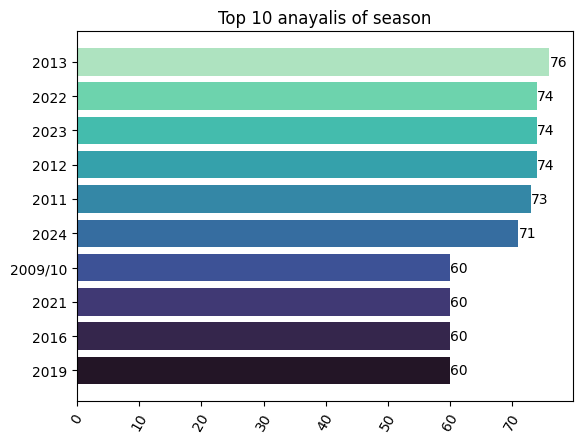

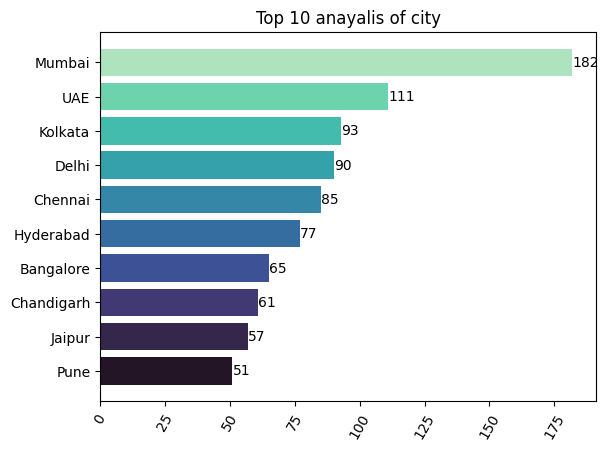

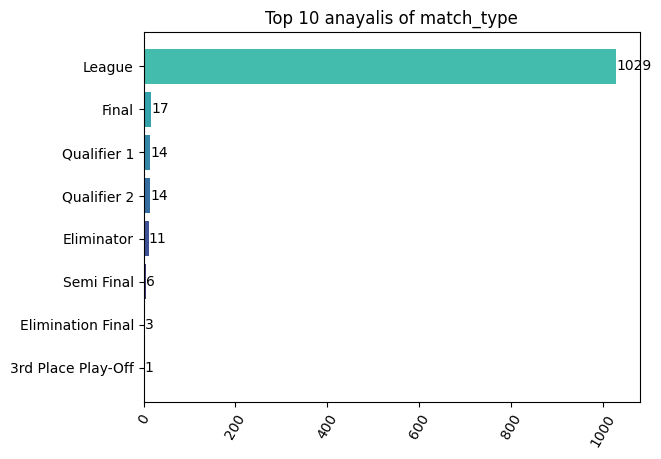

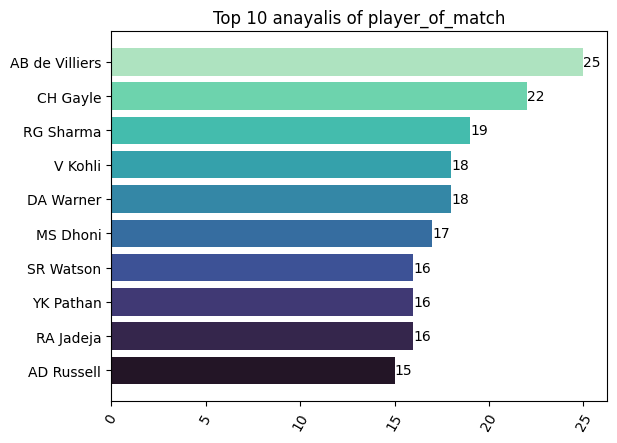

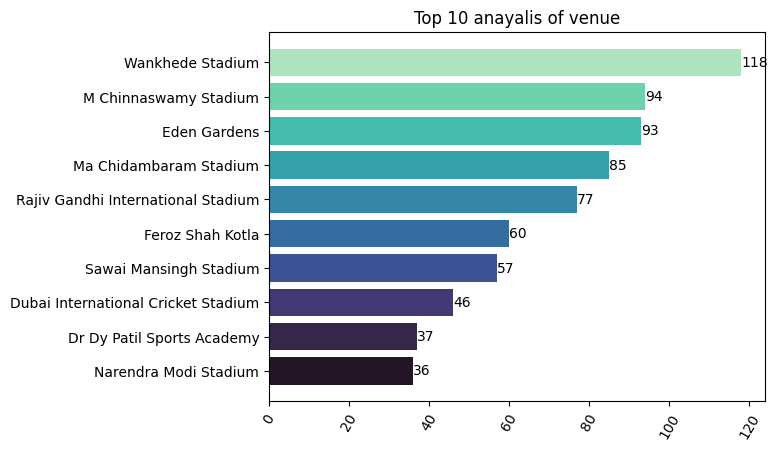

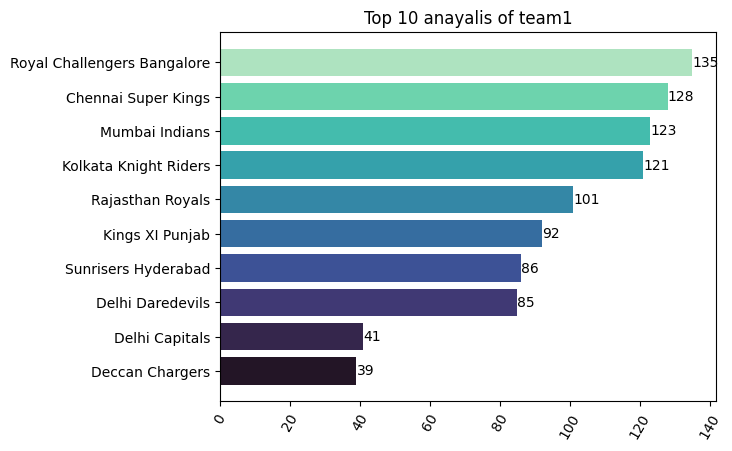

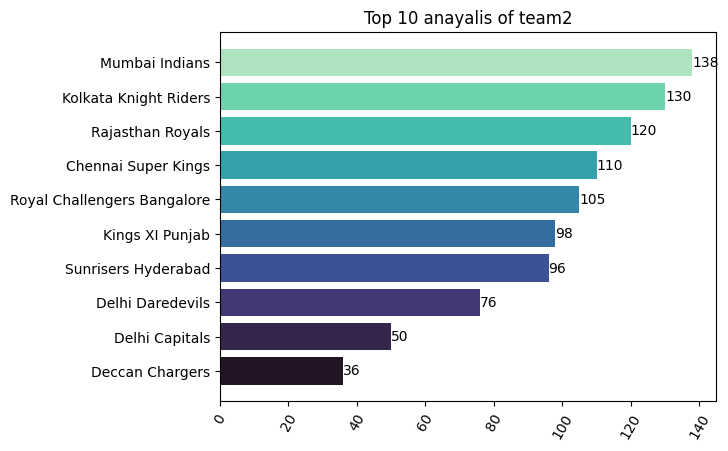

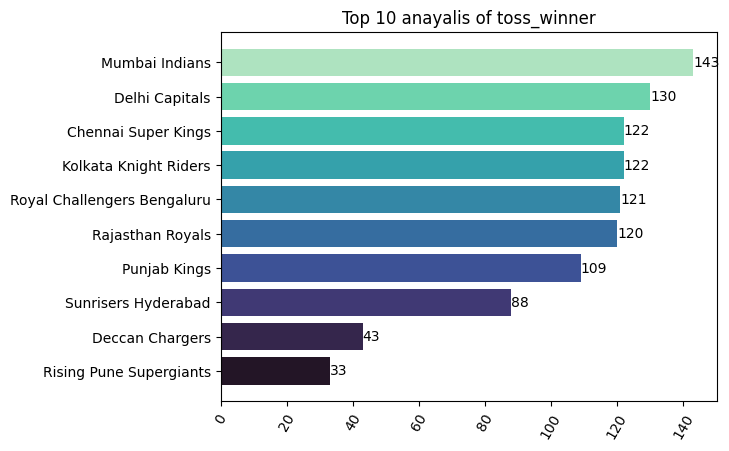

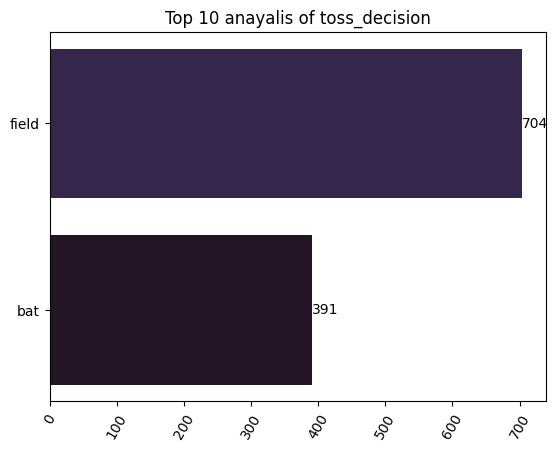

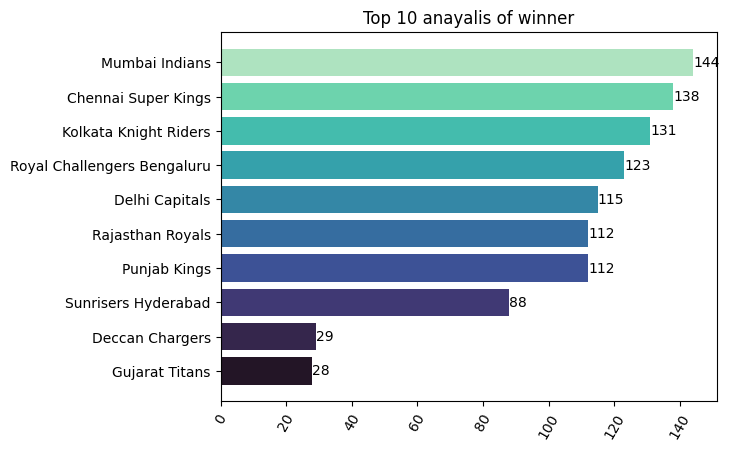

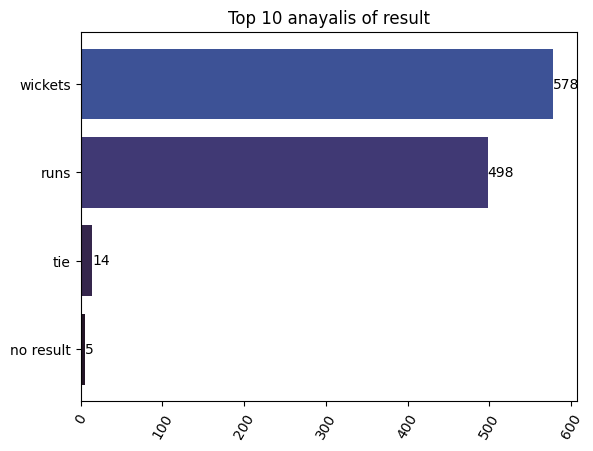

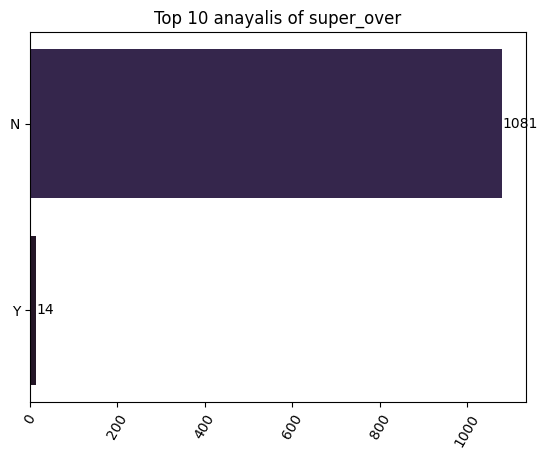

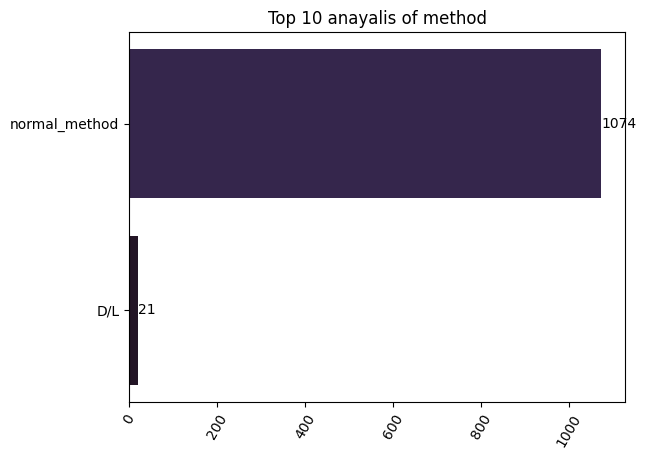

In [53]:
import matplotlib.pyplot as plt
for i in cat_cols:
    try:
        df=df_matches[i].value_counts().head(10).sort_values(ascending=True)
        x=df.index
        y=df.values
        plt.title(f'Top 10 anayalis of {i}')
        ax=plt.barh(x, y, color=sns.color_palette("mako", 10))
        plt.bar_label(ax)
        plt.xticks(rotation=60)
        plt.show()
    except Exception as e:
        print(e)

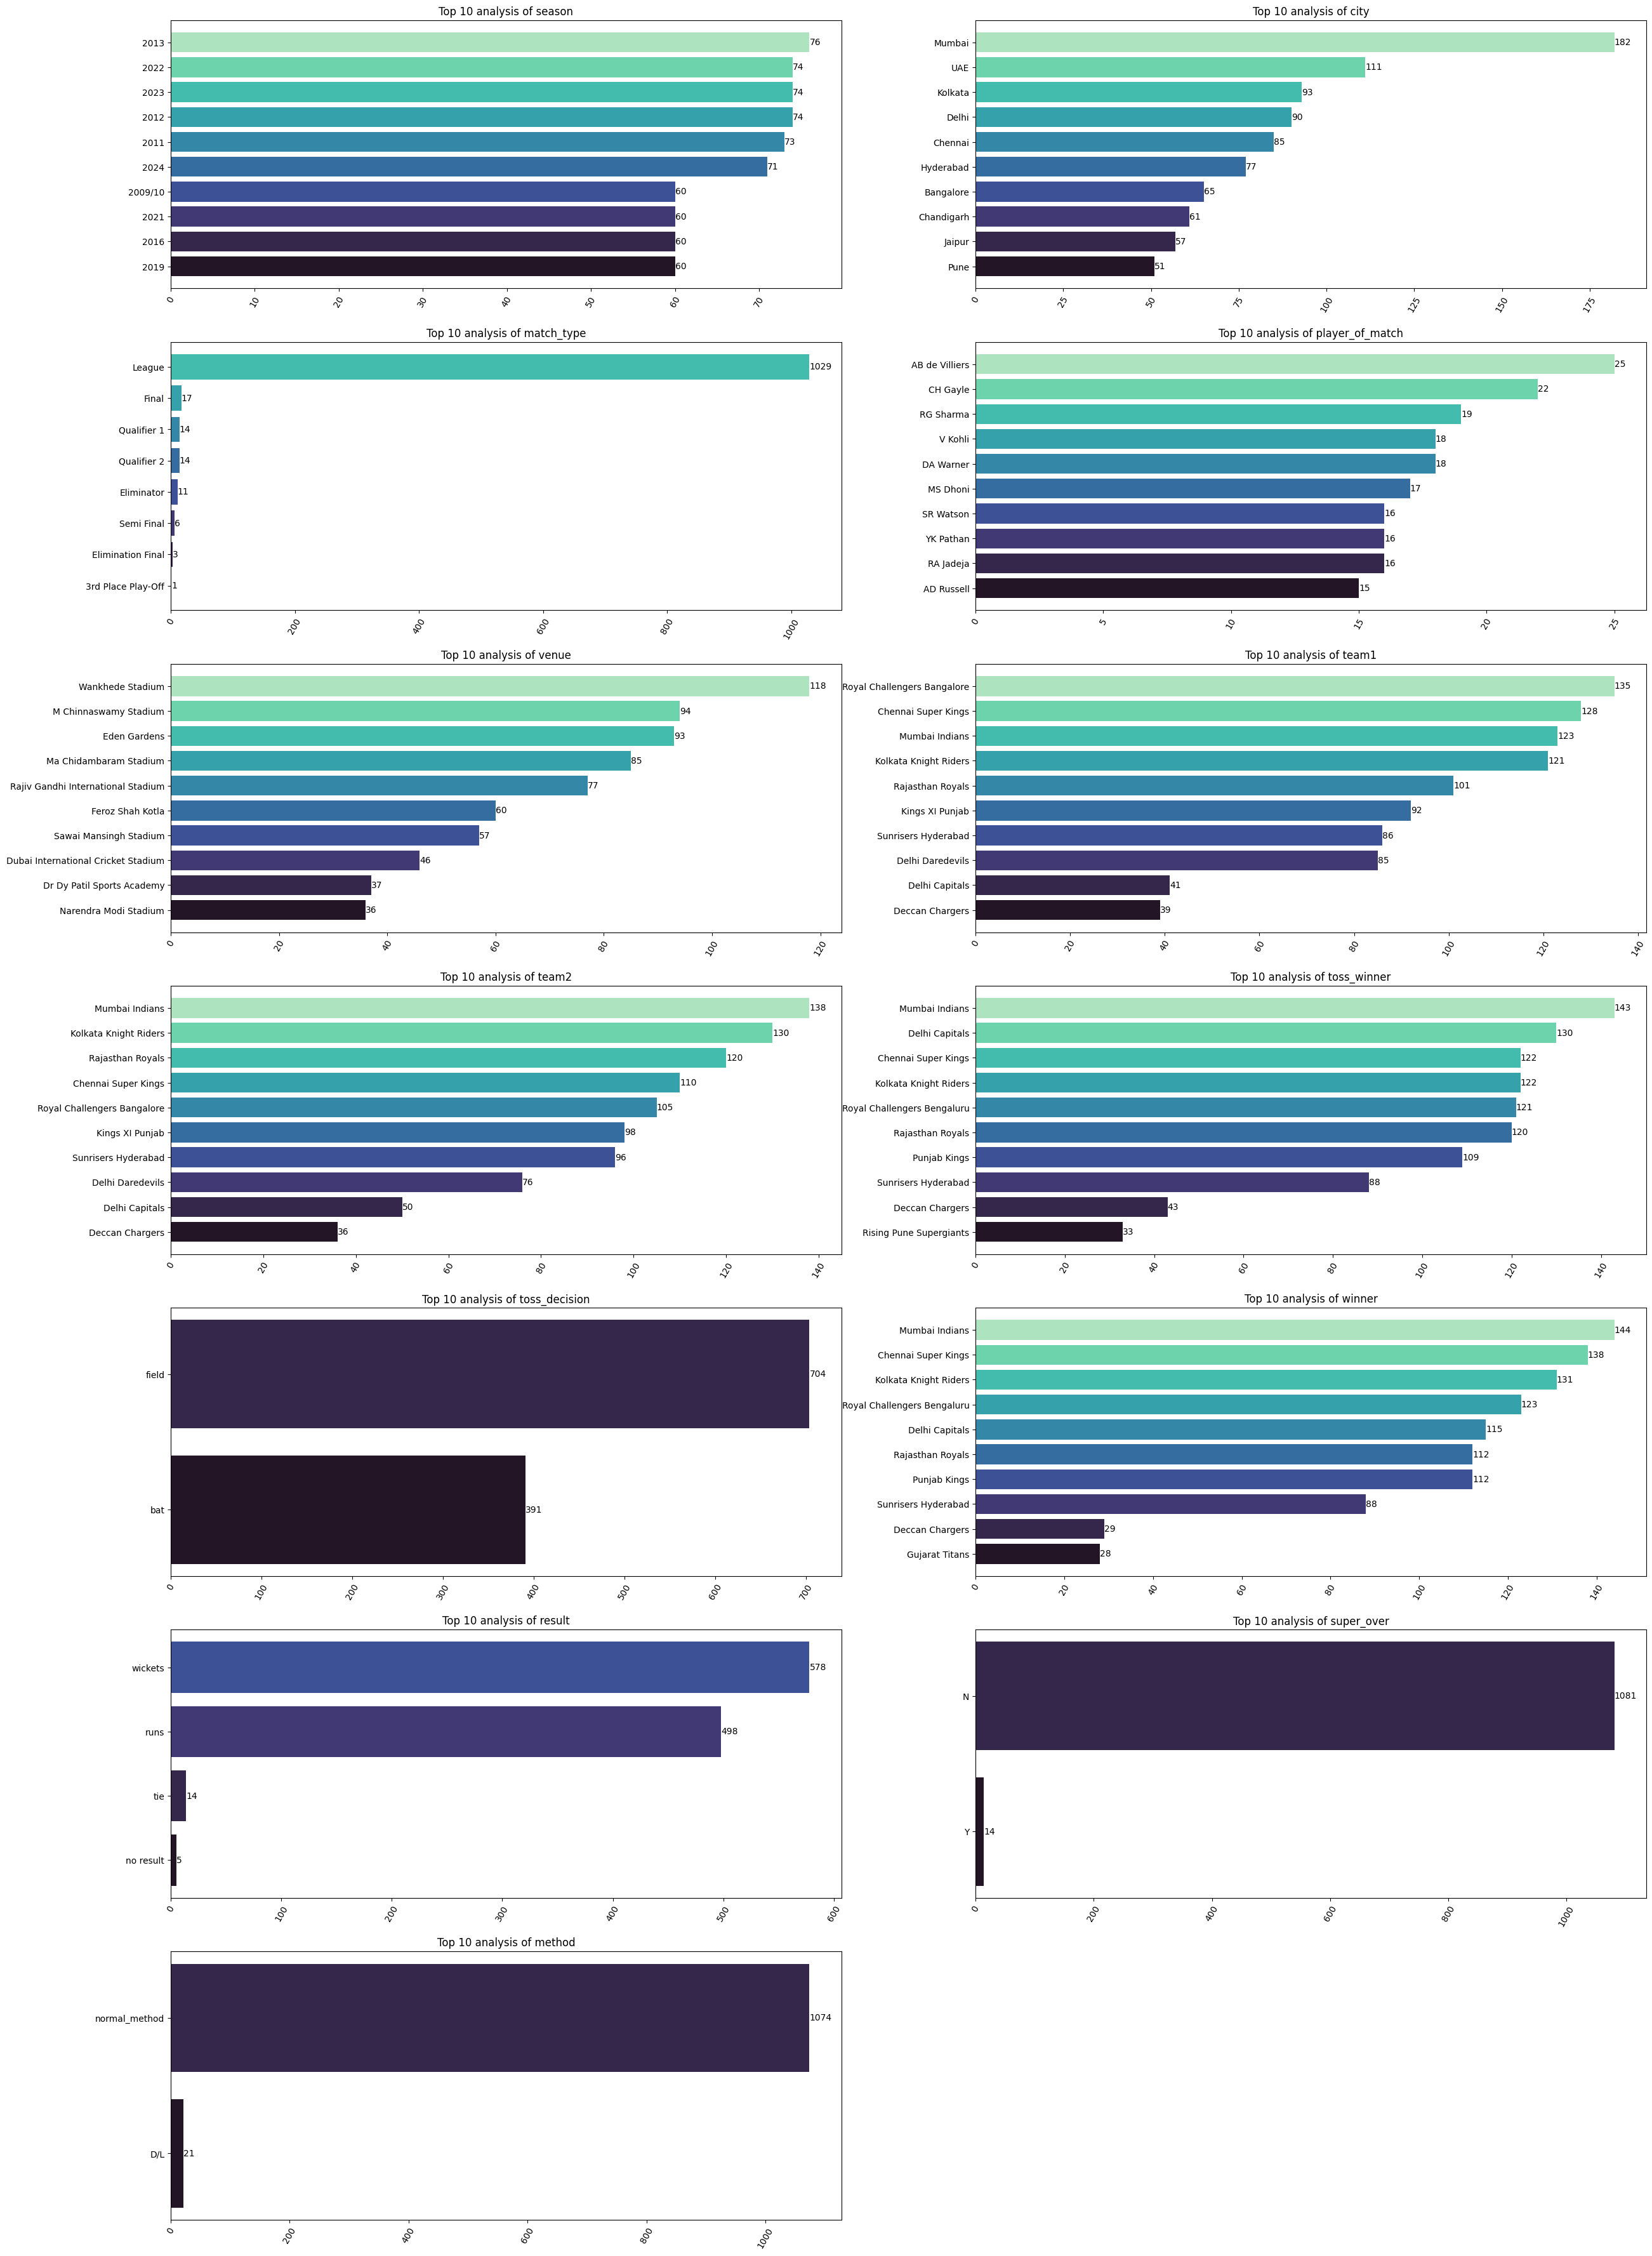

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 45))
for i, j in enumerate(cat_cols):
    df = df_matches[j].value_counts().head(10).sort_values(ascending=True)
    x = df.index
    y = df.values
    plt.subplot(7, 2, i+1)
    plt.title(f'Top 10 analysis of {j}')
    ax = plt.barh(x, y, color=sns.color_palette("mako", 10))
    plt.bar_label(ax)
    plt.xticks(rotation=60)



# plt.savefig('catagorical_analysis.png')
plt.show()

In [55]:
#here we remove unwanted columns from num_cols
num_cols=list(num_cols)
num_cols.remove("id")
num_cols.remove("date")
num_cols.remove("target_overs")

num_cols

['result_margin', 'target_runs']

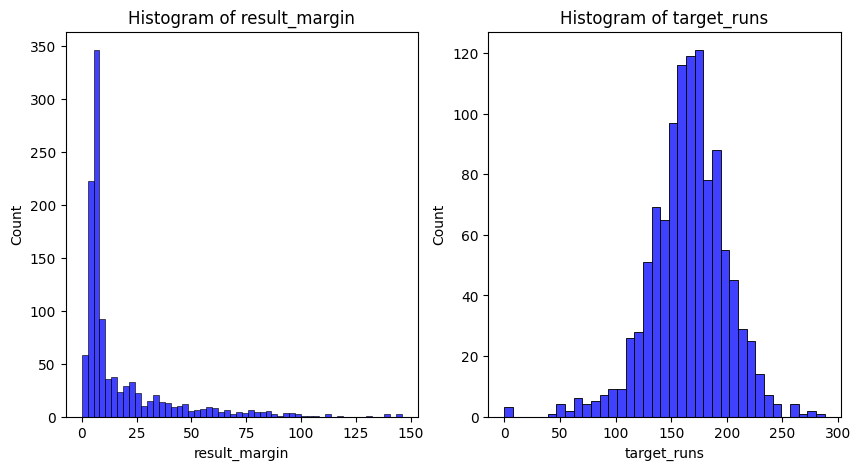

In [56]:
#histogram
plt.figure(figsize=(10, 5))
for j,i in enumerate(num_cols):
    plt.subplot(1, 2, j+1)
    plt.title(f'Histogram of {i}')
    sns.histplot(df_matches[i],color='blue')

plt.show()

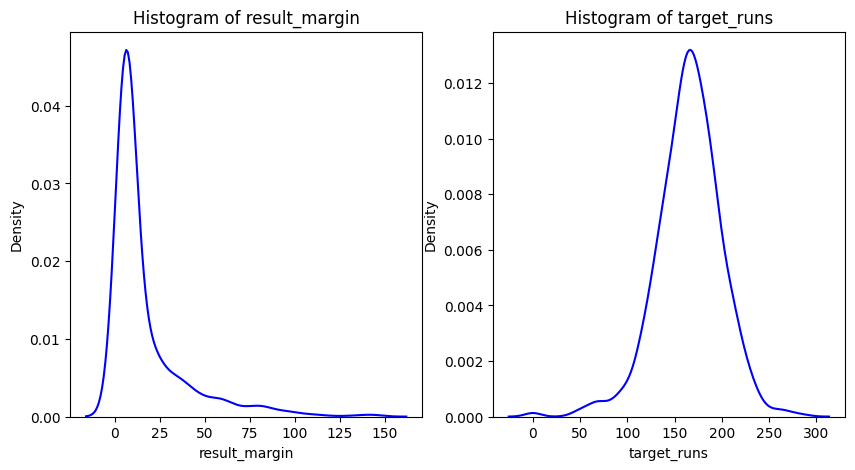

In [57]:
#histogram
plt.figure(figsize=(10, 5))
for j,i in enumerate(num_cols):
    plt.subplot(1, 2, j+1)
    plt.title(f'Histogram of {i}')
    sns.kdeplot(df_matches[i],color='blue')

plt.show()

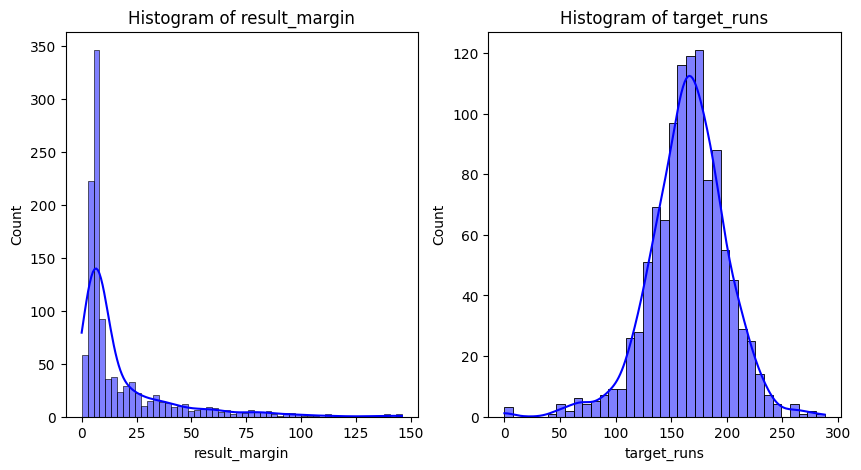

In [58]:
#histogram
plt.figure(figsize=(10, 5))
for j,i in enumerate(num_cols):
    plt.subplot(1, 2, j+1)
    plt.title(f'Histogram of {i}')
    sns.histplot(df_matches[i],color='blue',kde=True)

plt.show()

In [59]:
df_matches[df_matches["target_runs"]==df_matches["target_runs"].max()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method
1053,1426268,2024,Bengaluru,2024-04-15,League,TM Head,M Chinnaswamy Stadium,Sunrisers Hyderabad,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,Sunrisers Hyderabad,runs,25.0,288.0,20.0,N,normal_method


In [60]:
diff=df_matches[(df_matches["winner"]!="No Result") & (df_matches['method']=="normal_method")]
diff[diff['target_runs'] == diff['target_runs'].min()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method
37,336021,2007/08,Mumbai,2008-05-16,League,SM Pollock,Wankhede Stadium,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,Mumbai Indians,wickets,8.0,68.0,20.0,N,normal_method
611,1082626,2017,Chandigarh,2017-04-30,League,Sandeep Sharma,Punjab Cricket Association Is Bindra Stadium,Kings XI Punjab,Delhi Daredevils,Punjab Kings,field,Punjab Kings,wickets,10.0,68.0,20.0,N,normal_method


In [61]:
df_matches[df_matches['date'].dt.year==2017].sort_index(ascending=True)[['winner','result','result_margin']]

,winner,result,result_margin
577,Sunrisers Hyderabad,runs,35.0
578,Rising Pune Supergiants,wickets,7.0
579,Kolkata Knight Riders,wickets,10.0
580,Punjab Kings,wickets,6.0
581,Royal Challengers Bengaluru,runs,15.0
582,Sunrisers Hyderabad,wickets,9.0
583,Mumbai Indians,wickets,4.0
584,Punjab Kings,wickets,8.0
585,Delhi Capitals,runs,97.0
586,Mumbai Indians,wickets,4.0


In [62]:
df_matches.iloc[603,:] #iloc is used to access a group of rows and columns by label(s) or a boolean array
# it is used to access rows and columns by index position

id                                     1082617
season                                    2017
city                                   Kolkata
date                       2017-04-23 00:00:00
match_type                              League
player_of_match                NM Coulter-Nile
venue                             Eden Gardens
team1                    Kolkata Knight Riders
team2              Royal Challengers Bangalore
toss_winner        Royal Challengers Bengaluru
toss_decision                            field
winner                   Kolkata Knight Riders
result                                    runs
result_margin                             82.0
target_runs                              132.0
target_overs                              20.0
super_over                                   N
method                           normal_method
Name: 603, dtype: object

In [63]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method'],
      dtype='object')

In [64]:
df_matches.groupby(['venue','team1'])['target_runs'].agg(['max','min','mean'])

max    min        mean
venue                 team1                                                
Arun Jaitley Stadium  Chennai Super Kings          224.0  219.0  221.500000
                      Delhi Capitals               258.0  130.0  190.666667
                      Delhi Daredevils             220.0  151.0  179.833333
                      Kings XI Punjab              164.0  144.0  154.000000
                      Kolkata Knight Riders        186.0  128.0  157.000000
...                                                  ...    ...         ...
Zayed Cricket Stadium Kolkata Knight Riders        172.0  172.0  172.000000
                      Mumbai Indians               236.0  156.0  196.000000
                      Punjab Kings                 136.0  136.0  136.000000
                      Royal Challengers Bangalore   93.0   93.0   93.000000
                      Sunrisers Hyderabad          142.0  142.0  142.000000

[236 rows x 3 columns]

In [65]:
#add new column to df_matches
df_matches["year"]=df_matches["date"].dt.year

In [66]:
df_matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,year
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,normal_method,2008
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,Punjab Cricket Association Stadium,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,normal_method,2008
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,normal_method,2008
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5.0,166.0,20.0,N,normal_method,2008
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,normal_method,2008


In [67]:
all_team=df_matches.pivot_table(index='year',columns='team1',values='target_runs')
all_team

team1,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Gujarat Titans,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Punjab Kings,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Royal Challengers Bengaluru,Sunrisers Hyderabad
year,,,,,,,,,,,,,,,,,,,
2008,163.333333,174.428571,NaN,166.285714,NaN,NaN,186.285714,NaN,127.000000,NaN,143.285714,NaN,NaN,159.428571,NaN,NaN,157.142857,NaN,NaN
2009,164.727273,151.400000,NaN,131.777778,NaN,NaN,135.833333,NaN,147.500000,NaN,146.000000,NaN,NaN,NaN,NaN,NaN,151.187500,NaN,NaN
2010,164.900000,161.285714,NaN,173.571429,NaN,NaN,173.714286,NaN,161.857143,NaN,174.666667,NaN,NaN,156.857143,NaN,NaN,162.111111,NaN,NaN
2011,166.375000,162.285714,NaN,135.428571,NaN,NaN,181.714286,145.571429,128.428571,NaN,153.000000,144.142857,NaN,143.571429,NaN,NaN,156.000000,NaN,NaN
2012,154.666667,158.250000,NaN,171.600000,NaN,NaN,150.750000,NaN,155.000000,NaN,142.875000,150.750000,NaN,168.375000,NaN,NaN,173.714286,NaN,NaN
2013,172.000000,NaN,NaN,152.500000,NaN,NaN,165.875000,NaN,145.000000,NaN,176.333333,144.750000,NaN,152.888889,NaN,NaN,161.375000,NaN,135.625000
2014,172.222222,NaN,NaN,139.000000,NaN,NaN,164.750000,NaN,163.375000,NaN,173.714286,NaN,NaN,155.857143,NaN,NaN,165.000000,NaN,161.857143
2015,164.777778,NaN,NaN,146.000000,NaN,NaN,149.571429,NaN,172.833333,NaN,184.000000,NaN,NaN,176.714286,NaN,NaN,158.375000,NaN,141.142857
2016,NaN,NaN,NaN,156.857143,156.222222,NaN,168.857143,NaN,147.571429,NaN,160.285714,NaN,NaN,NaN,NaN,153.142857,201.375000,NaN,140.375000


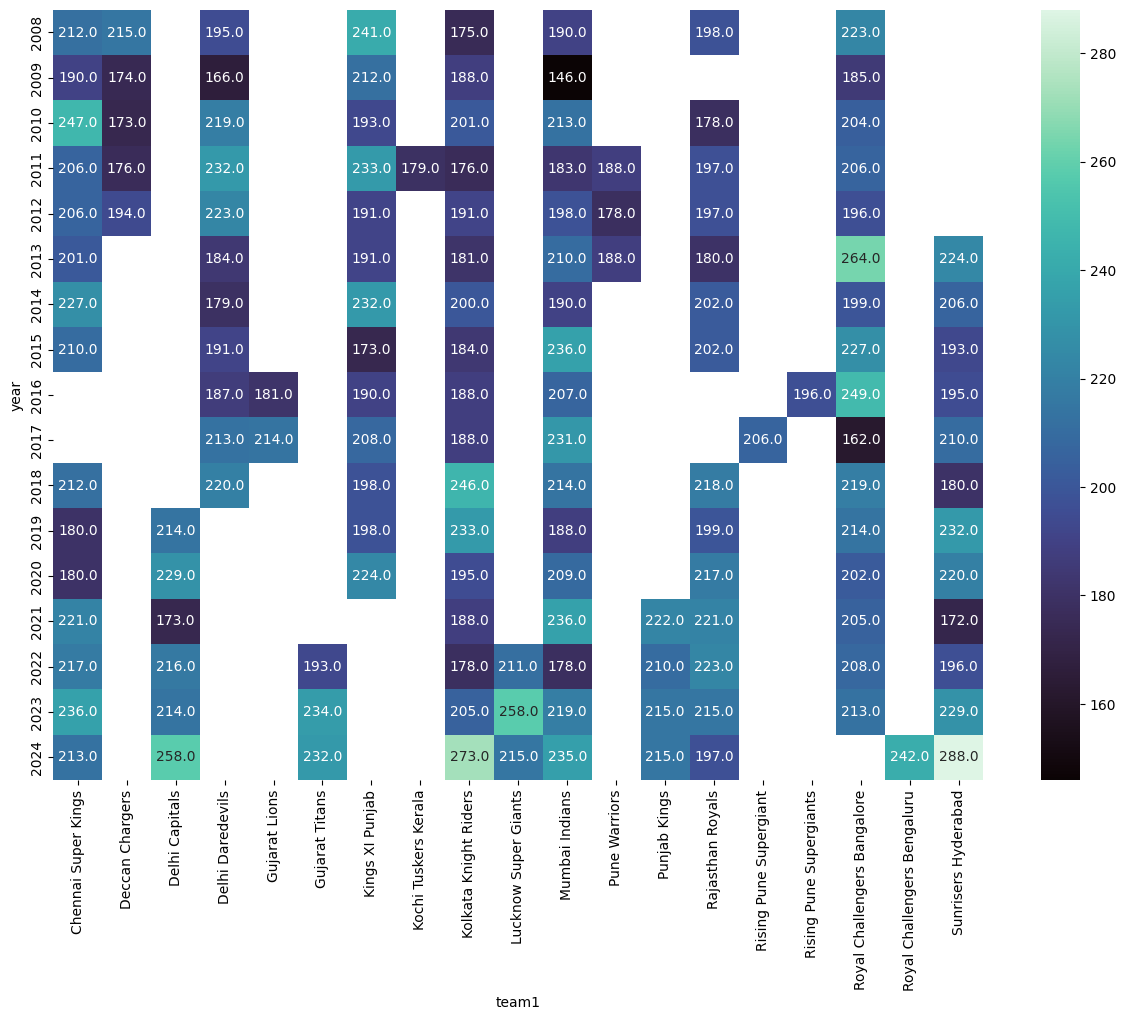

In [68]:
all_team=df_matches.pivot_table(index='year',columns='team1',values='target_runs',aggfunc='max')
all_team=all_team.round(0)
plt.figure(figsize=(15, 10))
# pd.options.display
# pd.options.display.float_format = ''.format

sns.heatmap(all_team,fmt='',annot = True,cmap="mako")
plt.show()

In [69]:
# LOC vs ILOC
# loc is used for label based indexing, which means you can access a group of rows and columns by labels or a boolean array.
# iloc is used for positional indexing, which means you can access a group of rows and columns by integer index positions.
df_matches.iloc[50:55,[4,6,8]]  #2nd bracket is for columns and 1st bracket is for rows
df_matches.loc[50:55,['team1','team2','target_runs']]  #2nd bracket is for columns and 1st bracket is for rows

,team1,team2,target_runs
50,Kolkata Knight Riders,Kings XI Punjab,175.0
51,Rajasthan Royals,Mumbai Indians,146.0
52,Deccan Chargers,Chennai Super Kings,148.0
53,Royal Challengers Bangalore,Mumbai Indians,123.0
54,Kings XI Punjab,Rajasthan Royals,222.0
55,Delhi Daredevils,Rajasthan Royals,193.0


In [70]:
rows = df_matches[df_matches['year']>=2016].index
df_matches.iloc[rows ,-3:]

,super_over,method,year
517,N,normal_method,2016
518,N,normal_method,2016
519,N,normal_method,2016
520,N,normal_method,2016
521,N,normal_method,2016
...,...,...,...
1090,N,normal_method,2024
1091,N,normal_method,2024
1092,N,normal_method,2024
1093,N,normal_method,2024


In [71]:
df_deliveries.head()
129729
df_deliveries.iloc[129729,:]

match_id                      980961
inning                             2
batting_team        Delhi Daredevils
bowling_team           Gujarat Lions
over                               1
ball                               3
batter                       RR Pant
bowler                   DS Kulkarni
non_striker                Q de Kock
batsman_runs                       4
extra_runs                         0
total_runs                         4
extras_type                      NaN
is_wicket                          0
player_dismissed                 NaN
dismissal_kind                   NaN
fielder                          NaN
Name: 129729, dtype: object

In [72]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [73]:
len(df_deliveries)

260920

In [74]:
waste_of_time=['fielder','dismissal_kind','player_dismissed','extras_type']
for i in waste_of_time:
  print(f'Analysis for {i}\n\n')
  display(df_deliveries[i].value_counts().head(10))

Analysis for fielder




fielder
MS Dhoni          220
KD Karthik        199
AB de Villiers    141
RV Uthappa        133
V Kohli           131
WP Saha           131
SK Raina          119
RA Jadeja         116
SV Samson         115
RG Sharma         111
Name: count, dtype: int64

Analysis for dismissal_kind




dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64

Analysis for player_dismissed




player_dismissed
RG Sharma     223
V Kohli       207
S Dhawan      193
KD Karthik    184
RV Uthappa    180
SK Raina      171
DA Warner     164
AT Rayudu     155
AM Rahane     154
SV Samson     144
Name: count, dtype: int64

Analysis for extras_type




extras_type
wides      8380
legbyes    4001
noballs    1069
byes        673
penalty       2
Name: count, dtype: int64

In [75]:
df_deliveries.fillna("Unoknown", inplace=True)

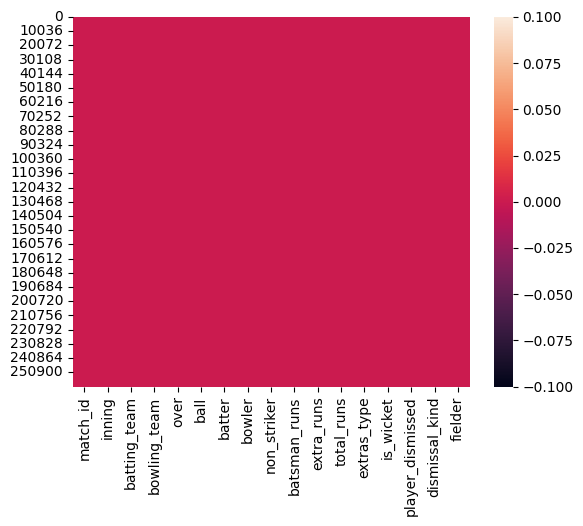

In [76]:

sns.heatmap(df_deliveries.isnull())
plt.show()

In [77]:
player=df_deliveries[df_deliveries["batter"]=="DA Miller"]
player["batsman_runs"].value_counts().sort_index(ascending=True)

batsman_runs
0    726
1    918
2    184
3      2
4    207
6    134
Name: count, dtype: int64

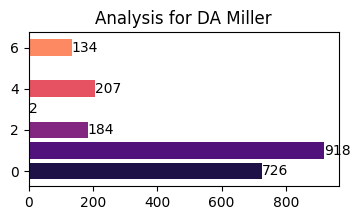

DA Miller Total Runs in IPL History: 2924
Batsman DA Miller Top 10 Performance Against Bowlers


,bowler,sum,mean
129,RA Jadeja,111,1.656716
122,R Ashwin,82,1.123288
173,YS Chahal,77,1.711111
1,A Mishra,68,1.307692
45,HV Patel,63,1.500000
14,Avesh Khan,61,1.525000
118,PP Chawla,60,1.176471
90,M Prasidh Krishna,59,1.685714
165,UT Yadav,55,1.341463
151,SP Narine,51,1.342105


In [78]:
def bat(batsman): 
# batsman = 'DA Miller'
    player_df =df_deliveries[df_deliveries['batter'] == batsman]
    x = player_df['batsman_runs'].value_counts().sort_index().index
    y = player_df['batsman_runs'].value_counts().sort_index().values
    plt.figure(figsize = (4,2))
    plt.title(f'Analysis for {batsman}')
    ax = plt.barh(x,y,color = sns.color_palette('magma',7))
    plt.bar_label(ax)
    plt.show()
    player_df.groupby('bowler')['batsman_runs'].agg(["sum","mean"]).sort_values(by='mean').head(10)
    total_runs = player_df['batsman_runs'].sum()
    print(f'{batsman} Total Runs in IPL History: {total_runs}')
    print(f'Batsman {batsman} Top 10 Performance Against Bowlers')
    perfomance_df = player_df.groupby('bowler')['batsman_runs'].agg(['sum','mean']).reset_index().sort_values(by = 'sum',ascending=False).head(10)
    display(perfomance_df)

bat('DA Miller')

In [79]:
total_batman=df_deliveries["batter"].unique()
print(total_batman)
len(total_batman)

['SC Ganguly' 'BB McCullum' 'RT Ponting' 'DJ Hussey' 'Mohammad Hafeez'
 'R Dravid' 'W Jaffer' 'V Kohli' 'JH Kallis' 'CL White' 'MV Boucher'
 'B Akhil' 'AA Noffke' 'P Kumar' 'Z Khan' 'SB Joshi' 'PA Patel'
 'ML Hayden' 'MEK Hussey' 'MS Dhoni' 'SK Raina' 'JDP Oram' 'S Badrinath'
 'K Goel' 'JR Hopes' 'KC Sangakkara' 'Yuvraj Singh' 'SM Katich'
 'IK Pathan' 'T Kohli' 'YK Pathan' 'SR Watson' 'M Kaif' 'DS Lehmann'
 'RA Jadeja' 'M Rawat' 'D Salunkhe' 'SK Warne' 'SK Trivedi' 'G Gambhir'
 'V Sehwag' 'S Dhawan' 'L Ronchi' 'ST Jayasuriya' 'DJ Thornely'
 'RV Uthappa' 'PR Shah' 'AM Nayar' 'SM Pollock' 'Harbhajan Singh'
 'S Chanderpaul' 'LRPL Taylor' 'AC Gilchrist' 'Y Venugopal Rao'
 'VVS Laxman' 'A Symonds' 'RG Sharma' 'SB Styris' 'AS Yadav' 'SB Bangar'
 'WPUJC Vaas' 'RP Singh' 'WP Saha' 'LR Shukla' 'DPMD Jayawardene'
 'S Sohal' 'B Lee' 'PP Chawla' 'WA Mota' 'Kamran Akmal' 'Shahid Afridi'
 'DJ Bravo' 'MA Khote' 'A Nehra' 'GC Smith' 'Pankaj Singh' 'RR Sarwan'
 'S Sreesanth' 'VRV Singh' 'SS Tiwary' 'DS

673